# *Iris* Data Classification (Using TensorFlow)

# **imports**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

# **dataset**

In [ ]:
a = pd.read_csv('/content/iris.csv')
iris = pd.DataFrame(a)
iris.head()

,sepal_l,sepal_w,petal_l,petal_w,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa



# **Data Preprocessing**
# This section prepares the dataset for training by:
# 1. Separating features (X) and labels (y).
# 2. Encoding the categorical target labels into numerical format.
# 3. Applying one-hot encoding for multi-class classification compatibility.
# 4. Scaling features for uniform input ranges.
# 5. Splitting the dataset into training and validation sets.

In [ ]:
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values

# Encode target labels to integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Convert labels to one-hot encoding
y = to_categorical(y)

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


## Model Development

# 1. Define a Sequential Model.
# 2. Add Layers(Hidden Layer, Output Layer).
# 3. Compile the Model.


In [ ]:

def create_model(activation):
    model = Sequential([
        Dense(64, input_dim=X_train.shape[1], activation=activation),  # First hidden layer
        Dense(32, activation=activation),  # Second hidden layer
        Dense(y_train.shape[1], activation='softmax')  # Output layer
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model



# **Model Training**
# in this section want to fit the model
# 1. Training Data: (X_train, y_train), used for model optimization.
# 2. Validation Data: (X_val, y_val), used to monitor performance on unseen data during training.
# 3. Number of Epochs: increase epochs = increase Validation Accuracy.
# 4. Batch Size: batch_size=16, determines the number of samples processed before the model's weights are updated.
# 5.  Verbose: verbose=1, displays progress and metrics during training.


In [ ]:


def train_model(model, X_train, y_train, X_val, y_val, epochs=20, batch_size=16):
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,  # Number of epochs
        batch_size=batch_size,  # Batch size
        verbose=1
    )
    return history





# **Model Evaluation**

# 1. evaluate a trained model using the validation dataset (X_val, y_val) and calculate its loss and accuracy.
# 2. display the performance metrics and training history for a specific activation function.
# 3. Prints the validation loss and accuracy for the model trained with the given activation function.
# 4. List of Activation Functions ['relu', 'sigmoid', 'tanh', 'linear']
# 5. Loop Through Activation Functions Iterates over each activation function in the list.


In [ ]:

# evaluate the model
def evaluate_model(model, X_val, y_val):
    val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
    return val_loss, val_accuracy# Function to evaluate the model
def evaluate_model(model, X_val, y_val):
    val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
    return val_loss, val_accuracy



In [ ]:
# Function to display output results
def display_results(activation, history, val_loss, val_accuracy):
    print(f"\nResults for model with {activation} activation:")
    print(f"Validation Loss: {val_loss}")
    print(f"Validation Accuracy: {val_accuracy}")

    # plot the train history
    import matplotlib.pyplot as plt
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='val accuracy')
    plt.title(f'Accuracy for {activation} activation')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()



Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5028 - loss: 1.0327 - val_accuracy: 0.7000 - val_loss: 0.9052
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6835 - loss: 0.8653 - val_accuracy: 0.7000 - val_loss: 0.7704
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7244 - loss: 0.7412 - val_accuracy: 0.7000 - val_loss: 0.6619
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6796 - loss: 0.6636 - val_accuracy: 0.7667 - val_loss: 0.5764
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7244 - loss: 0.6060 - val_accuracy: 0.7667 - val_loss: 0.5083
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7643 - loss: 0.5375 - val_accuracy: 0.8000 - val_loss: 0.4548
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8183 - loss: 0.4615 - val_accuracy: 0.8333 - val_loss: 0.4150
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8073 - loss: 0.4557 - val_accuracy: 0.8333 - val_loss: 0.3817
Epoc

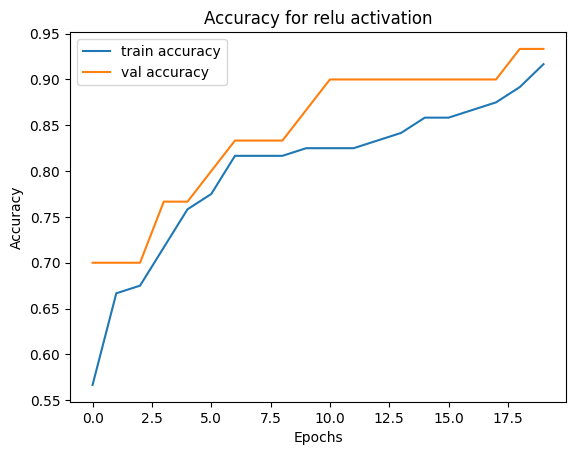

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.3762 - loss: 1.0832 - val_accuracy: 0.5000 - val_loss: 1.0638
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4960 - loss: 1.0610 - val_accuracy: 0.3000 - val_loss: 1.0492
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3761 - loss: 1.0401 - val_accuracy: 0.3000 - val_loss: 1.0316
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4771 - loss: 1.0264 - val_accuracy: 0.7000 - val_loss: 1.0061
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7136 - loss: 1.0056 - val_accuracy: 0.8333 - val_loss: 0.9837
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6898 - loss: 0.9824 - val_accuracy: 0.8333 - val_loss: 0.9614
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6993 - loss: 0.9654 - val_accuracy: 0.6667 - val_loss: 0.9397
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6901 - loss: 0.9380 - val_accuracy: 0.7000 - val_loss: 0.9129
Epoch 9

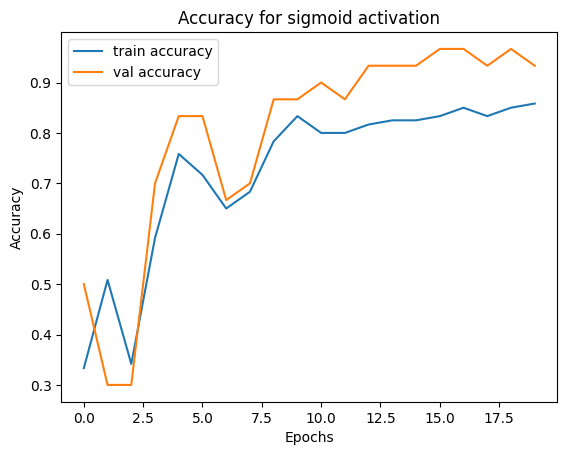

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.4109 - loss: 1.0923 - val_accuracy: 0.7333 - val_loss: 0.7402
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7005 - loss: 0.7670 - val_accuracy: 0.8333 - val_loss: 0.5419
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6870 - loss: 0.6248 - val_accuracy: 0.9000 - val_loss: 0.4431
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8211 - loss: 0.4771 - val_accuracy: 0.9000 - val_loss: 0.3851
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7802 - loss: 0.4411 - val_accuracy: 0.9000 - val_loss: 0.3500
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7771 - loss: 0.4201 - val_accuracy: 0.9000 - val_loss: 0.3245
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8568 - loss: 0.3836 - val_accuracy: 0.9000 - val_loss: 0.3031
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8355 - loss: 0.3515 - val_accuracy: 0.9000 - val_loss: 0.2867
Epoch 9

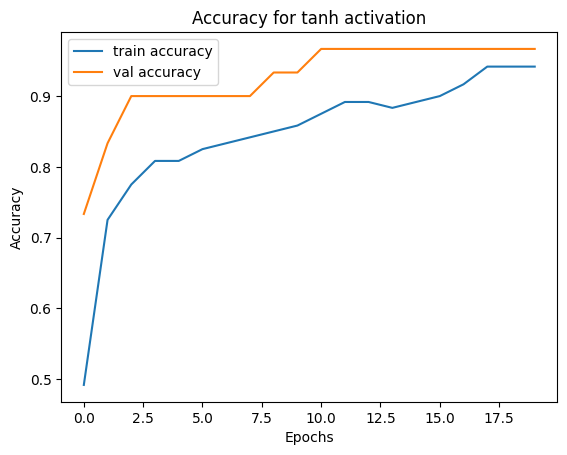

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5727 - loss: 0.9698 - val_accuracy: 0.9000 - val_loss: 0.6463
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8261 - loss: 0.6028 - val_accuracy: 0.9000 - val_loss: 0.4648
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8084 - loss: 0.4790 - val_accuracy: 0.9000 - val_loss: 0.3827
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8339 - loss: 0.4390 - val_accuracy: 0.9000 - val_loss: 0.3399
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8195 - loss: 0.3734 - val_accuracy: 0.9000 - val_loss: 0.3123
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8458 - loss: 0.3604 - val_accuracy: 0.9000 - val_loss: 0.2922
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8382 - loss: 0.3566 - val_accuracy: 0.9000 - val_loss: 0.2764
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8387 - loss: 0.3700 - val_accuracy: 0.9000 - val_loss: 0.2619
Epoch 9

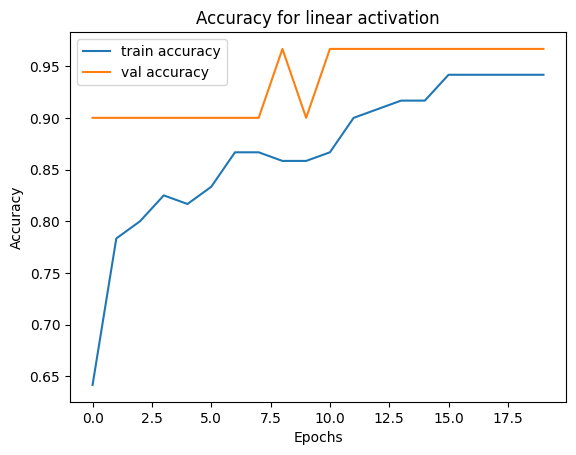

In [ ]:
# List of activation functions
activations = ['relu', 'sigmoid', 'tanh', 'linear']

# Loop through each activation function
for activation in activations:
    #  Create the model
    model = create_model(activation)

    #  Train the model
    history = train_model(model, X_train, y_train, X_val, y_val)

    #  Evaluate the model
    val_loss, val_accuracy = evaluate_model(model, X_val, y_val)

    #  Display the results
    display_results(activation, history, val_loss, val_accuracy)


# **Reflection**

# This project was an insightful journey into building a neural network for classifying the Iris dataset. It involved essential steps like preparing the data through scaling and encoding, designing a sequential model, and experimenting with activation functions such as relu, sigmoid, tanh, and linear. One of the key challenges was balancing the model’s accuracy and training efficiency by adjusting parameters like batch size and epochs. Watching how the performance metrics evolved during training was both exciting and educational, especially in understanding how activation functions and preprocessing impact the model. Overall, this experience deepened my understanding of building a neural network, making the process feel both rewarding and empowering.
